# Task to  classify borrowers is so that the bank can predict in advance the overdue payments on the loan.

## There is data set about the bank's borrowers.

In [1]:
import pandas as pd
german_data = pd.read_csv('german_credit_data.csv', sep=',')
german_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Analysis

In [2]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [3]:
german_data['Saving accounts'] = german_data['Saving accounts'].fillna(german_data['Saving accounts'].mode()[0])
german_data['Checking account'] = german_data['Checking account'].fillna(german_data['Checking account'].mode()[0])

In [4]:
german_data['Risk'] = german_data['Risk'].replace({'good' : 1 , 'bad': 0})

In [5]:
german_data['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [6]:
german_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,little,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [7]:
german_data['Risk'].value_counts()
#mostly loans are issued, the sample is not balanced

Risk
1    700
0    300
Name: count, dtype: int64

In [8]:
good_risk = german_data[german_data['Risk']==1]
bad_risk =german_data[german_data['Risk']==0]

In [9]:
good_risk1 = good_risk.sample(n=300)

In [10]:
germ_data = pd.concat([good_risk1, bad_risk])
germ_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
599,32,male,2,free,little,little,3863,24,business,1
678,64,male,1,rent,little,little,2384,24,radio/TV,1
484,44,male,2,own,quite rich,little,1163,12,car,1
269,25,male,2,own,little,little,999,24,radio/TV,1
147,51,female,2,own,moderate,little,682,12,car,1
...,...,...,...,...,...,...,...,...,...,...
979,25,male,2,rent,moderate,moderate,1264,15,car,0
980,49,male,2,own,little,moderate,8386,30,furniture/equipment,0
981,33,male,3,rent,little,little,4844,48,business,0
983,26,male,2,own,little,little,8229,36,car,0


In [11]:
germ_data['Housing'].value_counts()

Housing
own     408
rent    116
free     76
Name: count, dtype: int64

In [12]:
germ_data['Purpose'].value_counts()

Purpose
car                    213
radio/TV               154
furniture/equipment    106
business                65
education               35
repairs                 13
domestic appliances      7
vacation/others          7
Name: count, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram with Multiple Purposes')

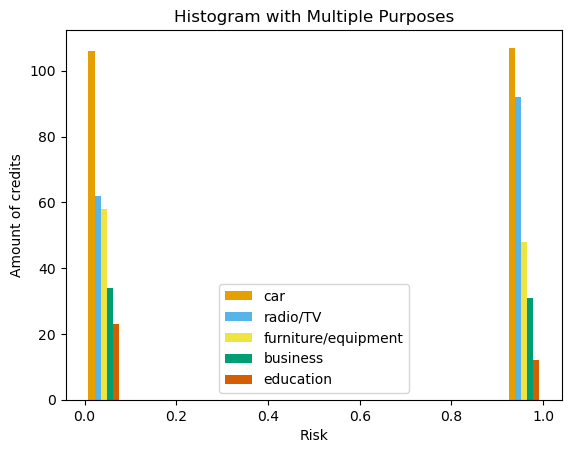

In [14]:
x1 = list(germ_data[germ_data['Purpose'] == 'car']['Risk'])
x2 = list(germ_data[germ_data['Purpose'] == 'radio/TV']['Risk'])
x3 = list(germ_data[germ_data['Purpose'] == 'furniture/equipment']['Risk'])
x4 = list(germ_data[germ_data['Purpose'] == 'business']['Risk'])
x5 = list(germ_data[germ_data['Purpose'] == 'education']['Risk'])


colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['car', 'radio/TV', 'furniture/equipment', 'business', 'education']


plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), 
         color = colors, label=names)

plt.legend()
plt.xlabel('Risk')
plt.ylabel('Amount of credits')
plt.title('Histogram with Multiple Purposes')
#It can be concluded that the most willing to give loans to radio and TV, but for cars
# and the bounce rate is higher.

Text(0.5, 1.0, 'Histogram with Multiple Housing')

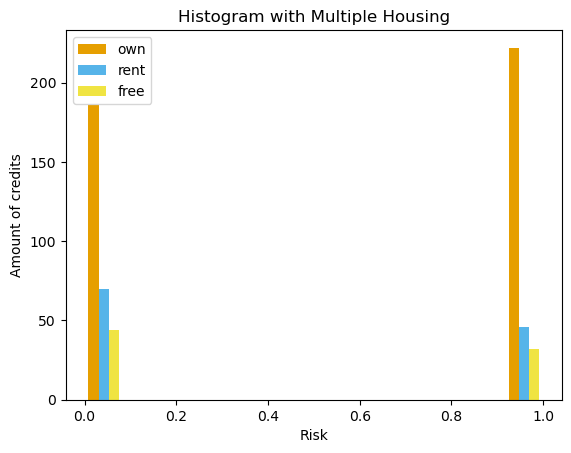

In [15]:
x1 = list(germ_data[germ_data['Housing'] == 'own']['Risk'])
x2 = list(germ_data[germ_data['Housing'] == 'rent']['Risk'])
x3 = list(germ_data[germ_data['Housing'] == 'free']['Risk'])


colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['own', 'rent', 'free']


plt.hist([x1, x2, x3], bins = int(180/15), 
         color = colors, label=names)

plt.legend()
plt.xlabel('Risk')
plt.ylabel('Amount of credits')
plt.title('Histogram with Multiple Housing')

#the proportions are about the same

In [16]:
germ_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
599,32,male,2,free,little,little,3863,24,business,1
678,64,male,1,rent,little,little,2384,24,radio/TV,1
484,44,male,2,own,quite rich,little,1163,12,car,1
269,25,male,2,own,little,little,999,24,radio/TV,1
147,51,female,2,own,moderate,little,682,12,car,1


<Axes: xlabel='Credit amount', ylabel='Duration'>

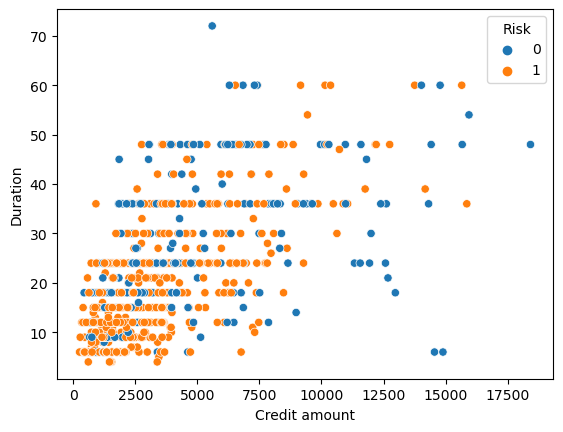

In [17]:
sns.scatterplot(data=german_data, x="Credit amount", y="Duration",  hue="Risk")
#the loan amount is proportional to the term and very large amounts with a long term are not issued

In [18]:
germ_data['Saving accounts'].value_counts()

Saving accounts
little        473
moderate       66
quite rich     36
rich           25
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram with Multiple Saving accounts')

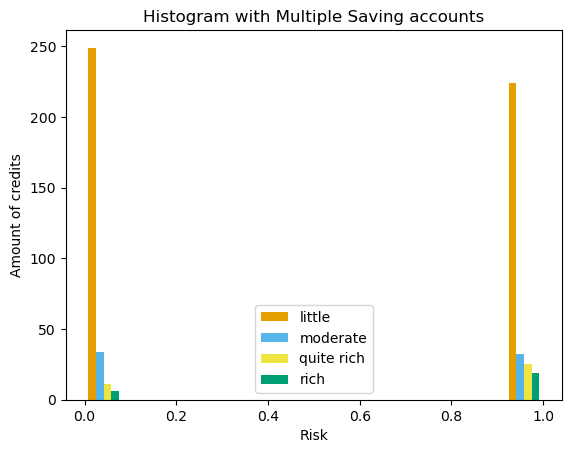

In [19]:
x1 = list(germ_data[germ_data['Saving accounts'] == 'little']['Risk'])
x2 = list(germ_data[germ_data['Saving accounts'] == 'moderate']['Risk'])
x3 = list(germ_data[germ_data['Saving accounts'] == 'quite rich']['Risk'])
x4 = list(germ_data[germ_data['Saving accounts'] == 'rich']['Risk'])


colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['little', 'moderate', 'quite rich','rich' ]


plt.hist([x1, x2, x3, x4], bins = int(180/15), 
         color = colors, label=names)

plt.legend()
plt.xlabel('Risk')
plt.ylabel('Amount of credits')
plt.title('Histogram with Multiple Saving accounts')

#borrowers who have a lot of funds in their savings account are mostly given loans

In [20]:
germ_data['Checking account'].value_counts()

Checking account
little      389
moderate    175
rich         36
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram with Multiple Checking account')

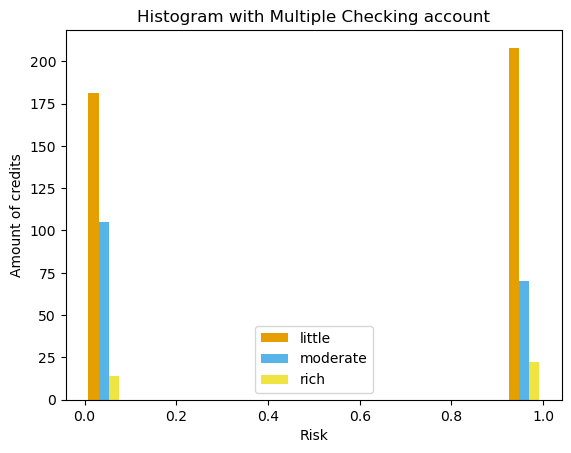

In [21]:
x1 = list(germ_data[germ_data['Checking account'] == 'little']['Risk'])
x2 = list(germ_data[germ_data['Checking account'] == 'moderate']['Risk'])
x3 = list(germ_data[germ_data['Checking account'] == 'rich']['Risk'])


colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['little', 'moderate', 'rich' ]


plt.hist([x1, x2, x3], bins = int(180/15), 
         color = colors, label=names)

plt.legend()
plt.xlabel('Risk')
plt.ylabel('Amount of credits')
plt.title('Histogram with Multiple Checking account')
#The borrower's main account has little effect on the decision to issue a loan

<Axes: xlabel='Job', ylabel='Age'>

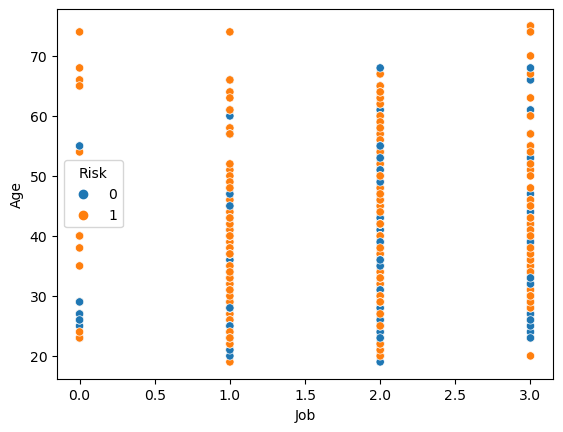

In [22]:
sns.scatterplot(data=german_data, x="Job", y="Age",  hue="Risk")
#there is no clear conclusion, but they mostly give loans to borrowers with 1 job

<Axes: xlabel='Sex', ylabel='Age'>

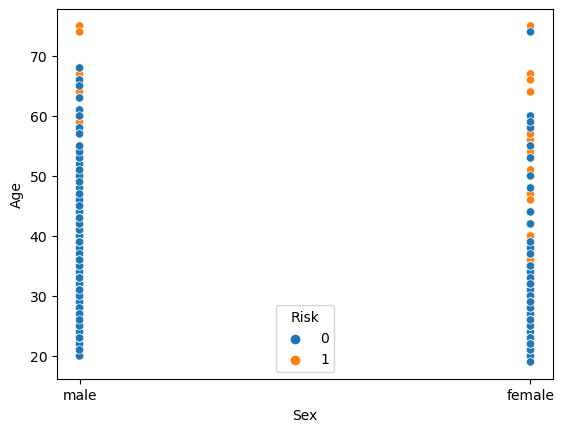

In [23]:
sns.scatterplot(data=germ_data, x="Sex", y="Age",  hue="Risk")
#women are given loans more often, but most likely this is also due to the purpose of the loan

In [24]:
#Conclusion: important features for learning can be: Purpose, Credit amount, Duration, Housing, Job, Age, Sex.

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(german_data, stratify = german_data['Risk'], test_size=0.2, random_state=1)

## Data preparation

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 561 to 664
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   800 non-null    object
 5   Checking account  800 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
 9   Risk              800 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 68.8+ KB


In [27]:
train.pop('Saving accounts')
train.pop('Checking account')

561      little
613      little
352      little
568    moderate
295    moderate
         ...   
59       little
397      little
227      little
128    moderate
664        rich
Name: Checking account, Length: 800, dtype: object

In [28]:
train

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
561,24,male,1,rent,1546,24,radio/TV,0
613,22,female,2,rent,3632,24,car,1
352,38,male,3,own,3229,18,car,1
568,41,male,2,own,3979,48,radio/TV,1
295,26,female,2,own,9960,48,furniture/equipment,0
...,...,...,...,...,...,...,...,...
59,23,female,1,rent,6229,36,furniture/equipment,0
397,46,male,2,own,2348,36,furniture/equipment,1
227,53,male,3,free,7865,12,furniture/equipment,0
128,34,male,3,own,1860,12,car,1


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
train_1 = train.drop(['Sex', 'Housing', 'Purpose', 'Risk'], axis=1)
train_2 = train[['Sex', 'Housing', 'Purpose', 'Risk']]

In [31]:
train_scaled=scaler.fit_transform(train_1)
train_scaled_df= pd.DataFrame(train_scaled, columns=train_1.columns)

In [32]:
train_scaled_df

,Age,Job,Credit amount,Duration
0,-1.034287,-1.405165,-0.607482,0.236012
1,-1.207679,0.138972,0.128437,0.236012
2,0.179461,1.683109,-0.013738,-0.255253
3,0.439550,0.138972,0.250854,2.201073
4,-0.860894,0.138972,2.360888,2.201073
...,...,...,...,...
795,-1.120983,-1.405165,1.044631,1.218543
796,0.873032,0.138972,-0.324545,1.218543
797,1.479906,1.683109,1.621794,-0.746518
798,-0.167324,1.683109,-0.496706,-0.746518


In [33]:
train_2 = train_2.reset_index()
train_2.pop('index')

0      561
1      613
2      352
3      568
4      295
      ... 
795     59
796    397
797    227
798    128
799    664
Name: index, Length: 800, dtype: int64

In [34]:
train_scaled_ = train_2.join(train_scaled_df)
train_scaled_

,Sex,Housing,Purpose,Risk,Age,Job,Credit amount,Duration
0,male,rent,radio/TV,0,-1.034287,-1.405165,-0.607482,0.236012
1,female,rent,car,1,-1.207679,0.138972,0.128437,0.236012
2,male,own,car,1,0.179461,1.683109,-0.013738,-0.255253
3,male,own,radio/TV,1,0.439550,0.138972,0.250854,2.201073
4,female,own,furniture/equipment,0,-0.860894,0.138972,2.360888,2.201073
...,...,...,...,...,...,...,...,...
795,female,rent,furniture/equipment,0,-1.120983,-1.405165,1.044631,1.218543
796,male,own,furniture/equipment,1,0.873032,0.138972,-0.324545,1.218543
797,male,free,furniture/equipment,0,1.479906,1.683109,1.621794,-0.746518
798,male,own,car,1,-0.167324,1.683109,-0.496706,-0.746518


In [35]:
ohe = OneHotEncoder(sparse=False)

In [36]:
ohe_df= ohe.fit_transform(train_scaled_[['Sex', 'Housing', 'Purpose']])
train_ohe = pd.DataFrame(ohe_df, columns = ohe.get_feature_names_out())

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
train_prep=train_scaled_.join(train_ohe)
train_prep

,Sex,Housing,Purpose,Risk,Age,Job,Credit amount,Duration,Sex_female,Sex_male,...,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,male,rent,radio/TV,0,-1.034287,-1.405165,-0.607482,0.236012,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,female,rent,car,1,-1.207679,0.138972,0.128437,0.236012,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,male,own,car,1,0.179461,1.683109,-0.013738,-0.255253,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,male,own,radio/TV,1,0.439550,0.138972,0.250854,2.201073,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,female,own,furniture/equipment,0,-0.860894,0.138972,2.360888,2.201073,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,rent,furniture/equipment,0,-1.120983,-1.405165,1.044631,1.218543,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
796,male,own,furniture/equipment,1,0.873032,0.138972,-0.324545,1.218543,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
797,male,free,furniture/equipment,0,1.479906,1.683109,1.621794,-0.746518,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,male,own,car,1,-0.167324,1.683109,-0.496706,-0.746518,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
train_prep.pop('Sex')
train_prep.pop('Housing')
train_prep.pop('Purpose')

0                 radio/TV
1                      car
2                      car
3                 radio/TV
4      furniture/equipment
              ...         
795    furniture/equipment
796    furniture/equipment
797    furniture/equipment
798                    car
799              education
Name: Purpose, Length: 800, dtype: object

In [39]:
train_prep

,Risk,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,-1.034287,-1.405165,-0.607482,0.236012,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,-1.207679,0.138972,0.128437,0.236012,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.179461,1.683109,-0.013738,-0.255253,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.439550,0.138972,0.250854,2.201073,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.860894,0.138972,2.360888,2.201073,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,-1.120983,-1.405165,1.044631,1.218543,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
796,1,0.873032,0.138972,-0.324545,1.218543,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
797,0,1.479906,1.683109,1.621794,-0.746518,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,1,-0.167324,1.683109,-0.496706,-0.746518,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 586 to 784
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               200 non-null    int64 
 1   Sex               200 non-null    object
 2   Job               200 non-null    int64 
 3   Housing           200 non-null    object
 4   Saving accounts   200 non-null    object
 5   Checking account  200 non-null    object
 6   Credit amount     200 non-null    int64 
 7   Duration          200 non-null    int64 
 8   Purpose           200 non-null    object
 9   Risk              200 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 17.2+ KB


In [41]:
test.pop('Saving accounts')
test.pop('Checking account')

586      little
803      little
846      little
932      little
788    moderate
         ...   
459      little
812      little
888      little
490      little
784    moderate
Name: Checking account, Length: 200, dtype: object

In [42]:
scaler = StandardScaler()
test_1 = test.drop(['Sex', 'Housing', 'Purpose', 'Risk'], axis=1)
test_2 = test[['Sex', 'Housing', 'Purpose', 'Risk']]

In [43]:
test_scaled=scaler.fit_transform(test_1)
test_scaled_df= pd.DataFrame(test_scaled, columns=test_1.columns)

In [44]:
test_scaled_df

,Age,Job,Credit amount,Duration
0,0.188687,0.177783,-0.175424,-0.973353
1,0.093869,0.177783,-0.834083,-0.708974
2,3.222852,0.177783,1.256065,-0.180218
3,-0.380219,0.177783,-0.744479,-0.973353
4,1.516134,0.177783,1.062044,2.463565
...,...,...,...,...
195,-0.190583,0.177783,0.473118,-0.180218
196,-0.949125,0.177783,2.292287,1.406052
197,-0.000948,1.659305,1.202953,1.406052
198,-0.759489,0.177783,-0.487953,-0.708974


In [45]:
test_2= test_2.reset_index()

In [46]:
test_2.pop('index')

0      586
1      803
2      846
3      932
4      788
      ... 
195    459
196    812
197    888
198    490
199    784
Name: index, Length: 200, dtype: int64

In [47]:
test_scaled_ = test_2.join(test_scaled_df)


In [48]:
ohe = OneHotEncoder(sparse=False)

In [49]:
ohe_df= ohe.fit_transform(test_scaled_[['Sex', 'Housing', 'Purpose']])
train_ohe = pd.DataFrame(ohe_df, columns = ohe.get_feature_names_out())

test_prep=test_scaled_.join(train_ohe)


test_prep.pop('Sex')
test_prep.pop('Housing')
test_prep.pop('Purpose')
test_prep

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Risk,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1,0.188687,0.177783,-0.175424,-0.973353,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.093869,0.177783,-0.834083,-0.708974,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,3.222852,0.177783,1.256065,-0.180218,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-0.380219,0.177783,-0.744479,-0.973353,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.516134,0.177783,1.062044,2.463565,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,-0.190583,0.177783,0.473118,-0.180218,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,0,-0.949125,0.177783,2.292287,1.406052,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197,1,-0.000948,1.659305,1.202953,1.406052,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
198,1,-0.759489,0.177783,-0.487953,-0.708974,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Sample balancing using the SMOTE method

In [50]:
!pip install imbalanced-learn

In [51]:
!pip install imblearn

In [52]:
train_prep.columns.tolist()[1:]

['Age',
 'Job',
 'Credit amount',
 'Duration',
 'Sex_female',
 'Sex_male',
 'Housing_free',
 'Housing_own',
 'Housing_rent',
 'Purpose_business',
 'Purpose_car',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_furniture/equipment',
 'Purpose_radio/TV',
 'Purpose_repairs',
 'Purpose_vacation/others']

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [54]:
os=  SMOTE(random_state=1)

features= train_prep.columns.tolist()[1:]
target=['Risk']

X_train, y_train = os.fit_resample(train_prep[features], train_prep[target])

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
x_test, y_test= test_prep[features], test_prep[target]

In [57]:
model = RandomForestClassifier(n_estimators= 10, max_depth=3, random_state=1)
model.fit(X_train, y_train)

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4578/3681889961.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=10, random_state=1)

In [58]:
print(roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
#the score is quite high, let's see if it can be increased

0.7041071428571428


In [59]:
param_grid = { 
    'n_estimators': [10, 20, 30],
    'max_depth' : [3,4,5,6]
}

In [60]:
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
model.fit(X_train, y_train)

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30]})

In [61]:
model.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [62]:
model = RandomForestClassifier(
 max_depth= 6,

 n_estimators=20)
model.fit(X_train, y_train)

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4578/3759830194.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=20)

In [63]:
print(roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
#The score has become lower

0.6132738095238095


In [64]:
#using class weights for training
class_weights={
    0:1,
    1: train_prep[train_prep['Risk']==0].shape[0]/train_prep[train_prep['Risk']==1].shape[0]
}

In [65]:
model = RandomForestClassifier(n_estimators= 10, max_depth=3, random_state=1, class_weight=class_weights)
model.fit(X_train, y_train)


/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4578/3691614766.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 0.42857142857142855}, max_depth=3,
                       n_estimators=10, random_state=1)

In [66]:
print(roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
#the score is even higher than in the case without weights

0.715


In [67]:
param_grid = { 
    'n_estimators': [10, 20, 30, 40],
    'max_depth' : [3,4,5,6],
    'class_weight':[{0:1,
    1: train_prep[train_prep['Risk']==0].shape[0]/train_prep[train_prep['Risk']==1].shape[0]},{
                    0:1,
    1: train_prep[train_prep['Risk']==0].shape[0]/train_prep[train_prep['Risk']==1].shape[0]**2},
                    {0:1,
    1: train_prep[train_prep['Risk']==0].shape[0]/train_prep[train_prep['Risk']==1].shape[0]**3}]
}

In [68]:
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
model.fit(X_train, y_train)

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sofatrifonova/anaconda3/lib/python3.11/site-packages/sklearn/model_selec

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 0.42857142857142855},
                                          {0: 1, 1: 0.0007653061224489796},
                                          {0: 1, 1: 1.3666180758017493e-06}],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40]})

In [69]:
model.best_params_

{'class_weight': {0: 1, 1: 0.42857142857142855},
 'max_depth': 6,
 'n_estimators': 30}

In [70]:
class_weights={
    0: 1,
    1: 0.42857142857142855
}

In [71]:
model = RandomForestClassifier(
 max_depth= 6,
class_weight=class_weights,
 n_estimators=40)
model.fit(X_train, y_train)

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_4578/1106515479.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 0.42857142857142855}, max_depth=6,
                       n_estimators=40)

In [72]:
print(roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

0.6494642857142858
